# Drilling Rate Of Penetration (ROP) Prediction

#### Import Library

In [876]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Collect Data

`Sumur UP-5`

In [877]:
excel_up5 = 'UP-5.csv'
data_up5 = pd.read_csv(excel_up5)

`Sumur UP-6`

In [878]:
excel_up6 = 'UP-6.csv'
data_up6 = pd.read_csv(excel_up6)

#### Explore Data

`Sumur UP-5`

In [879]:
data_up5.head()

,Formation,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Seno,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01,19/06/2010 07.12.15
1,Seno,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05,19/06/2010 07.14.23
2,Seno,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09,19/06/2010 07.16.43
3,Seno,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20,19/06/2010 09.04.13
4,Seno,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23,19/06/2010 09.05.52


In [880]:
data_up5.shape

(2058, 14)

In [881]:
data_up5.columns

Index(['Formation', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)', 'WOB (ton)',
       'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb.ft)', 'MW IN (ppg)',
       'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)', 'DATE TIME'],
      dtype='object')

In [882]:
data_up5.describe().T

,count,mean,std,min,25%,50%,75%,max
TMD (m),2058.0,1456.500000,594.237747,428.000,942.2500,1456.500,1970.7500,2485.00
TVD (m),2058.0,1456.411924,594.199795,428.010,942.1775,1456.425,1970.6675,2484.79
ROP (m/hr),2058.0,72.522935,32.636414,3.100,49.7250,67.200,91.8750,203.20
WOB (ton),2058.0,8.744412,3.591133,0.000,7.0000,9.000,11.0000,22.00
FR (gpm),2058.0,824.538387,34.861439,428.800,815.2000,823.400,844.3000,1130.50
SPP (psi),2058.0,2959.543246,581.566385,547.000,2434.5000,2901.000,3443.5000,3966.00
RPM (rpm),2058.0,156.351312,23.840552,70.000,146.0000,158.000,167.0000,199.00
TQ (lb.ft),2058.0,9213.728377,3168.341569,784.000,6946.5000,9147.500,11404.5000,19822.00
MW IN (ppg),2058.0,10.852662,0.250399,10.400,10.5000,11.000,11.0000,11.00
MW OUT (ppg),2058.0,10.872496,0.262644,10.388,10.5560,10.900,11.0800,11.08


In [883]:
#Cek Missing Data
data_up5.isnull().sum()

Formation        0
TMD (m)          0
TVD (m)          0
ROP (m/hr)       0
WOB (ton)        0
FR (gpm)         0
SPP (psi)        0
RPM (rpm)        0
TQ (lb.ft)       0
MW IN (ppg)      0
MW OUT (ppg)     0
RETURN (%)       0
BIT TIME (hr)    0
DATE TIME        0
dtype: int64

In [884]:
set(data_up5.Formation)

{'Albi',
 'Apti',
 'Barre',
 'Ceno',
 'Eren Shale',
 'Malcolm',
 'Mikasa Anhydrite',
 'Neo',
 'Seno',
 'Turo'}

C:\Users\kemalrevian\AppData\Local\Temp\ipykernel_30148\3403221562.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_up5.corr(method="pearson"),cmap="YlGnBu" ,annot=True)


<Axes: >

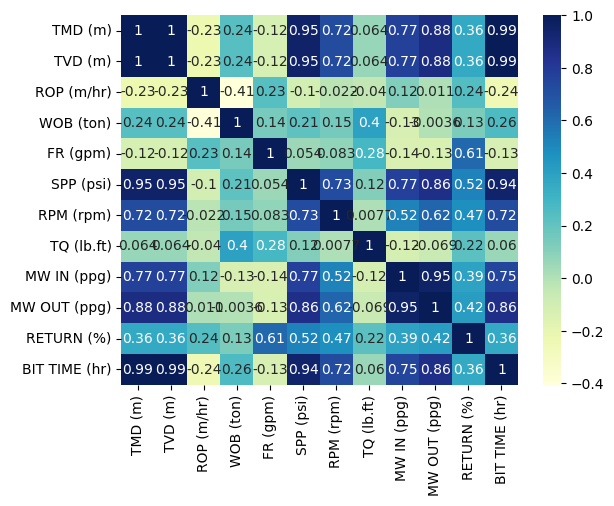

In [885]:
sns.heatmap(data_up5.corr(method="pearson"),cmap="YlGnBu" ,annot=True)

`Sumur UP-6`

In [886]:
data_up6.head()

,FORMATION,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr),DATE TIME
0,Mio,24.0,18,18.02,25.6,2,152.4,10,62,1363,8.7,8.7,0,0.04,28/07/2010 12.17.20
1,Mio,24.0,19,19.00,35.5,2,152.2,10,57,649,8.7,8.7,0,0.11,28/07/2010 12.21.35
2,Mio,24.0,20,19.50,20.6,2,114.3,8,43,0,8.7,8.7,0,0.17,28/07/2010 12.46.54
3,Mio,24.0,21,19.50,20.1,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31
4,Mio,24.0,22,19.50,19.9,2,152.3,10,58,0,8.7,8.7,0,0.17,28/07/2010 12.25.31


In [887]:
data_up6.shape

(2513, 15)

In [888]:
data_up6.columns

Index(['FORMATION', 'BIT SIZE (in)', 'TMD (m)', 'TVD (m)', 'ROP (m/hr)',
       'WOB (ton)', 'FR (gpm)', 'SPP (psi)', 'RPM (rpm)', 'TQ (lb*ft)',
       'MW IN (ppg)', 'MW OUT (ppg)', 'RETURN (%)', 'BIT TIME (hr)',
       'DATE TIME'],
      dtype='object')

In [889]:
data_up6.describe().T

,count,mean,std,min,25%,50%,75%,max
BIT SIZE (in),2513.0,13.040092,2.105961,12.250,12.250,12.250,12.250,24.000
TMD (m),2513.0,1274.000000,725.584936,18.000,646.000,1274.000,1902.000,2530.000
TVD (m),2513.0,1273.917839,725.552343,18.020,646.000,1273.940,1901.870,2529.770
ROP (m/hr),2513.0,84.100398,42.813343,2.700,50.800,77.400,115.800,309.100
WOB (ton),2513.0,9.636689,3.502575,0.000,7.000,10.000,12.000,21.000
FR (gpm),2513.0,764.088977,135.322381,114.300,766.100,796.500,828.300,1410.900
SPP (psi),2513.0,3006.333068,1262.556996,8.000,2362.000,3317.000,4009.000,4416.000
RPM (rpm),2513.0,140.845603,33.564465,21.000,134.000,150.000,164.000,196.000
TQ (lb*ft),2513.0,7737.759650,3199.764775,0.000,5524.000,8166.000,10033.000,18147.000
MW IN (ppg),2513.0,10.543717,0.798868,8.420,10.577,10.919,10.977,11.208


In [890]:
#Cek Missing Data
data_up6.isnull().sum()

FORMATION        0
BIT SIZE (in)    0
TMD (m)          0
TVD (m)          0
ROP (m/hr)       0
WOB (ton)        0
FR (gpm)         0
SPP (psi)        0
RPM (rpm)        0
TQ (lb*ft)       0
MW IN (ppg)      0
MW OUT (ppg)     0
RETURN (%)       0
BIT TIME (hr)    0
DATE TIME        0
dtype: int64

In [891]:
set(data_up6.FORMATION)

{'Albi',
 'Apti',
 'Barre',
 'Ceno',
 'Eren Shale',
 'Malcolm',
 'Mikasa Ahydrite',
 'Mio',
 'Neo',
 'Seno anhydratic ',
 'Seno carbonate',
 'Seno salt'}

C:\Users\kemalrevian\AppData\Local\Temp\ipykernel_30148\3644466393.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_up6.corr(method="pearson"),cmap="YlGnBu", annot=True)


<Axes: >

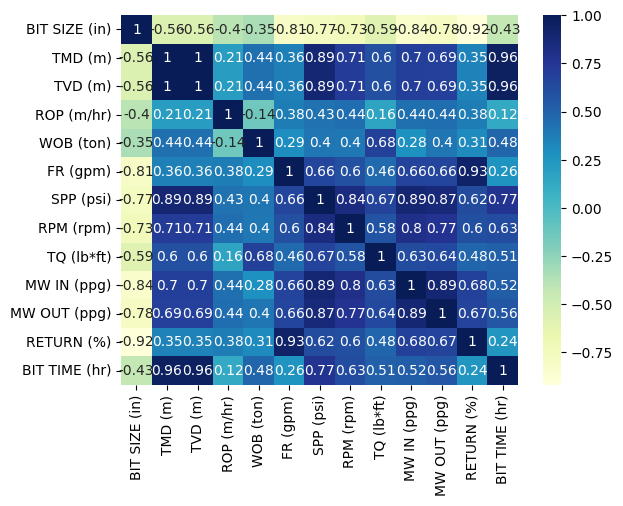

In [892]:
sns.heatmap(data_up6.corr(method="pearson"),cmap="YlGnBu", annot=True)

`Sumur UP-5`

In [893]:
num_data_up5 = data_up5.drop(["DATE TIME","Formation"], axis=1)
num_data_up5

,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
0,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,44,0.01
1,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,40,0.05
2,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,40,0.09
3,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,48,0.20
4,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,58,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2481,2480.79,11.5,17,737.4,3289,137,6867,11.0,11.080,60,50.07
2054,2482,2481.80,25.6,13,737.1,3291,136,7945,11.0,11.080,60,50.14
2055,2483,2482.80,36.7,7,735.2,3298,127,5831,11.0,11.080,59,50.19
2056,2484,2483.79,22.5,11,733.7,3290,135,7808,11.0,11.080,59,50.28


In [894]:
cat_data = data_up5.drop(num_data_up5, axis=1)
cat_data_up5 = cat_data.drop(["DATE TIME"], axis=1)

cat_data_up5.head()

,Formation
0,Seno
1,Seno
2,Seno
3,Seno
4,Seno


`Sumur UP-6`

In [895]:
num_data_up6 = data_up6.drop(["DATE TIME","FORMATION"], axis=1)
num_data_up6.head()

,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),RETURN (%),BIT TIME (hr)
0,24.0,18,18.02,25.6,2,152.4,10,62,1363,8.7,8.7,0,0.04
1,24.0,19,19.00,35.5,2,152.2,10,57,649,8.7,8.7,0,0.11
2,24.0,20,19.50,20.6,2,114.3,8,43,0,8.7,8.7,0,0.17
3,24.0,21,19.50,20.1,2,152.3,10,58,0,8.7,8.7,0,0.17
4,24.0,22,19.50,19.9,2,152.3,10,58,0,8.7,8.7,0,0.17


In [896]:
cat_data = data_up6.drop(num_data_up6, axis=1)
cat_data_up6 = cat_data.drop(["DATE TIME"], axis=1)

cat_data_up6.head()

,FORMATION
0,Mio
1,Mio
2,Mio
3,Mio
4,Mio


#### Encoding

In [897]:
from sklearn import preprocessing

`Sumur UP-5`

In [898]:
oh_enc_up5 = preprocessing.OneHotEncoder()
ohe_out_up5 = pd.DataFrame(oh_enc_up5.fit_transform(cat_data_up5[["Formation"]]).toarray())

ohe_out_up5.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [899]:
ohe_out_up5.columns = ["Albi","Apti","Barre","Ceno","Eren Shale","Malcolm","Mikasa Anhydrite","Neo","Seno","Turo"]
ohe_out_up5.head()

,Albi,Apti,Barre,Ceno,Eren Shale,Malcolm,Mikasa Anhydrite,Neo,Seno,Turo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [900]:
clean_data_up5 = pd.concat([num_data_up5, ohe_out_up5], axis=1)

In [901]:
clean_data_up5.head()

,TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),...,Albi,Apti,Barre,Ceno,Eren Shale,Malcolm,Mikasa Anhydrite,Neo,Seno,Turo
0,428,428.01,33.3,3,514.3,818,70,1915,10.4,10.401,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,429,429.01,39.3,4,428.8,554,79,2383,10.4,10.403,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,430,430.00,26.7,3,442.7,547,79,2499,10.4,10.405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,431,430.99,29.1,5,604.9,1259,82,1080,10.4,10.407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,432,432.00,40.8,10,782.1,1846,92,3106,10.4,10.409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


`Sumur UP-6`

In [902]:
oh_enc_up6 = preprocessing.OneHotEncoder()
ohe_out_up6 = pd.DataFrame(oh_enc_up6.fit_transform(data_up6[["FORMATION"]]).toarray())

ohe_out_up6.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [903]:
ohe_out_up6.columns = ["Albi","Apti","Barre","Ceno","Eren Shale","Malcolm","Mikasa Anhydrite","Mio","Neo","Seno Anhydratic","Seno Carbonat","Seno Salt"]
ohe_out_up6.head()

,Albi,Apti,Barre,Ceno,Eren Shale,Malcolm,Mikasa Anhydrite,Mio,Neo,Seno Anhydratic,Seno Carbonat,Seno Salt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [904]:
clean_data_up6 = pd.concat([num_data_up6, ohe_out_up6], axis=1)

In [905]:
clean_data_up6.head()

,BIT SIZE (in),TMD (m),TVD (m),ROP (m/hr),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),...,Barre,Ceno,Eren Shale,Malcolm,Mikasa Anhydrite,Mio,Neo,Seno Anhydratic,Seno Carbonat,Seno Salt
0,24.0,18,18.02,25.6,2,152.4,10,62,1363,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,24.0,19,19.00,35.5,2,152.2,10,57,649,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,24.0,20,19.50,20.6,2,114.3,8,43,0,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,24.0,21,19.50,20.1,2,152.3,10,58,0,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24.0,22,19.50,19.9,2,152.3,10,58,0,8.7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Data Prepocessing

`Sumur UP-5`

In [906]:
input_data_up5 = clean_data_up5.drop("ROP (m/hr)", axis=1)
output_data_up5 = clean_data_up5["ROP (m/hr)"]

In [907]:
from sklearn.model_selection import train_test_split

In [908]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(input_data_up5, 
                                                    output_data_up5, 
                                                    test_size=0.2,
                                                    random_state=0)

In [909]:
X_train5.shape, X_test5.shape

((1646, 21), (412, 21))

In [910]:
y_train5.shape, y_test5.shape

((1646,), (412,))

`Sumur UP_6`

In [911]:
input_data_up6 = clean_data_up6.drop("ROP (m/hr)", axis=1)
output_data_up6 = clean_data_up6["ROP (m/hr)"]

In [912]:
from sklearn.model_selection import train_test_split

In [913]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(input_data_up6, 
                                                    output_data_up6, 
                                                    test_size=0.2,
                                                    random_state=0)

In [914]:
X_train6.shape, X_test6.shape

((2010, 24), (503, 24))

In [915]:
y_train6.shape, y_test6.shape

((2010,), (503,))

#### Feature Scaling

`Sumur UP-5`

In [916]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [917]:
sc.fit(X_train5)

X_train5_scaled = sc.transform(X_train5)

X_test5_scaled = sc.transform(X_test5)

In [918]:
X_train5.columns

Index(['TMD (m)', 'TVD (m)', 'WOB (ton)', 'FR (gpm)', 'SPP (psi)', 'RPM (rpm)',
       'TQ (lb.ft)', 'MW IN (ppg)', 'MW OUT (ppg)', 'RETURN (%)',
       'BIT TIME (hr)', 'Albi', 'Apti', 'Barre', 'Ceno', 'Eren Shale',
       'Malcolm', 'Mikasa Anhydrite', 'Neo', 'Seno', 'Turo'],
      dtype='object')

In [919]:
X_train5_scaled = pd.DataFrame(X_train5_scaled, columns=input_data_up5.columns)
X_train5_scaled

,TMD (m),TVD (m),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),...,Albi,Apti,Barre,Ceno,Eren Shale,Malcolm,Mikasa Anhydrite,Neo,Seno,Turo
0,1.739768,1.739671,0.618586,-2.551711,0.577284,-0.732279,0.002346,0.580900,0.782617,-2.223540,...,-0.346017,-0.140807,-0.492203,-0.328134,-0.365525,-0.328134,6.594428,-0.399965,-0.440021,-0.213877
1,0.843554,0.843604,-0.498466,-0.152412,0.912063,0.368945,-0.903667,0.580900,0.782617,0.193862,...,-0.346017,-0.140807,-0.492203,-0.328134,-0.365525,-0.328134,-0.151643,2.500220,-0.440021,-0.213877
2,-1.653647,-1.653602,-0.219203,0.028454,-1.469355,-0.351087,0.122810,-1.828872,-1.831037,-1.619190,...,-0.346017,-0.140807,-0.492203,-0.328134,-0.365525,-0.328134,-0.151643,-0.399965,2.272618,-0.213877
3,1.212882,1.212854,0.339323,-0.084587,1.422860,1.216040,-0.498529,0.580900,0.782617,0.193862,...,-0.346017,-0.140807,-0.492203,-0.328134,-0.365525,3.047540,-0.151643,-0.399965,-0.440021,-0.213877
4,0.282785,0.282834,-1.056992,-1.387387,-0.123336,-0.096958,-1.477137,0.580900,0.782617,-1.014839,...,-0.346017,-0.140807,2.031681,-0.328134,-0.365525,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1641,0.004941,0.004973,-1.056992,-1.330866,-0.290725,-0.181667,-1.241282,0.580900,0.094813,-1.014839,...,-0.346017,-0.140807,2.031681,-0.328134,-0.365525,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877
1642,1.187470,1.187457,0.339323,0.048237,1.497064,1.088976,0.433479,0.580900,0.782617,0.798213,...,-0.346017,-0.140807,-0.492203,-0.328134,-0.365525,3.047540,-0.151643,-0.399965,-0.440021,-0.213877
1643,-0.452483,-0.452548,-0.777729,0.571052,-0.040504,0.157171,0.033413,0.580900,0.094813,0.798213,...,2.890030,-0.140807,-0.492203,-0.328134,-0.365525,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877
1644,-0.330503,-0.330578,-0.219203,-0.129803,-0.083646,-2.680599,0.953058,0.580900,0.094813,0.193862,...,2.890030,-0.140807,-0.492203,-0.328134,-0.365525,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877


In [920]:
X_test5_scaled = pd.DataFrame(X_test5_scaled, columns=input_data_up5.columns)
X_test5_scaled

,TMD (m),TVD (m),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb.ft),MW IN (ppg),MW OUT (ppg),RETURN (%),...,Albi,Apti,Barre,Ceno,Eren Shale,Malcolm,Mikasa Anhydrite,Neo,Seno,Turo
0,1.348415,1.348413,0.060060,-0.030892,1.529852,1.470169,0.538409,0.580900,0.782617,0.798213,...,-0.346017,-0.140807,-0.492203,-0.328134,2.735788,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877
1,0.804588,0.804653,-0.219203,7.087877,1.029409,0.241880,-0.407230,0.580900,0.782617,0.798213,...,-0.346017,-0.140807,-0.492203,-0.328134,-0.365525,-0.328134,-0.151643,2.500220,-0.440021,-0.213877
2,1.631341,1.631272,1.735638,-0.223062,1.514321,1.343104,-0.954388,0.580900,0.782617,0.193862,...,-0.346017,-0.140807,-0.492203,-0.328134,2.735788,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877
3,0.540298,0.540380,0.060060,-0.005458,0.755028,0.538364,1.871751,0.580900,0.782617,0.798213,...,-0.346017,-0.140807,-0.492203,-0.328134,-0.365525,-0.328134,-0.151643,2.500220,-0.440021,-0.213877
4,-0.421988,-0.422018,-1.056992,-0.313495,-0.370106,0.241880,-0.632941,0.580900,0.094813,-0.410488,...,2.890030,-0.140807,-0.492203,-0.328134,-0.365525,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,-0.735409,-0.735390,-0.219203,0.746266,-0.358026,0.241880,-0.899229,0.580900,0.094813,1.402563,...,-0.346017,-0.140807,-0.492203,3.047540,-0.365525,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877
408,1.451760,1.451713,0.060060,0.152800,1.679985,1.470169,0.076209,0.580900,0.782617,0.798213,...,-0.346017,-0.140807,-0.492203,-0.328134,2.735788,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877
409,-0.149228,-0.149341,-1.615518,-0.005458,0.163125,-0.224022,0.045142,0.580900,0.094813,-0.410488,...,-0.346017,-0.140807,2.031681,-0.328134,-0.365525,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877
410,-0.671031,-0.671042,-0.498466,-0.186324,-0.666920,0.114816,-1.265692,0.580900,0.094813,0.193862,...,2.890030,-0.140807,-0.492203,-0.328134,-0.365525,-0.328134,-0.151643,-0.399965,-0.440021,-0.213877


`Sumur UP-6`

In [921]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [922]:
sc.fit(X_train6)

X_train6_scaled = sc.transform(X_train6)

X_test6_scaled = sc.transform(X_test6)

In [923]:
X_train6.columns

Index(['BIT SIZE (in)', 'TMD (m)', 'TVD (m)', 'WOB (ton)', 'FR (gpm)',
       'SPP (psi)', 'RPM (rpm)', 'TQ (lb*ft)', 'MW IN (ppg)', 'MW OUT (ppg)',
       'RETURN (%)', 'BIT TIME (hr)', 'Albi', 'Apti', 'Barre', 'Ceno',
       'Eren Shale', 'Malcolm', 'Mikasa Anhydrite', 'Mio', 'Neo',
       'Seno Anhydratic', 'Seno Carbonat', 'Seno Salt'],
      dtype='object')

In [924]:
X_train6_scaled = pd.DataFrame(X_train6_scaled, columns=input_data_up6.columns)
X_train6_scaled

,BIT SIZE (in),TMD (m),TVD (m),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),...,Barre,Ceno,Eren Shale,Malcolm,Mikasa Anhydrite,Mio,Neo,Seno Anhydratic,Seno Carbonat,Seno Salt
0,-0.382413,-0.740490,-0.740406,-0.454466,-1.292794,-1.246458,0.312680,-1.387249,0.566965,0.817549,...,-0.440790,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,3.883298
1,1.423625,-1.360340,-1.360260,-1.599175,-2.836970,-2.166147,-1.719830,-1.630638,-2.477578,-3.244307,...,-0.440790,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,3.423670,-0.257513
2,-0.382413,-0.419497,-0.419396,0.117888,0.726799,0.172941,-0.217540,0.466562,0.658661,0.428769,...,-0.440790,2.816617,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,-0.257513
3,-0.382413,0.793913,0.793897,0.404065,0.198391,0.754752,0.312680,0.970814,0.506248,0.393195,...,-0.440790,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,2.889435,-0.329636,-0.292084,-0.257513
4,-0.382413,0.770392,0.770375,0.976419,0.040167,0.596076,0.047570,0.160142,0.580595,0.395736,...,-0.440790,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,2.889435,-0.329636,-0.292084,-0.257513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005,-0.382413,-0.296357,-0.296222,-1.026821,0.493195,0.142942,0.312680,-0.719178,0.395965,0.264872,...,-0.440790,2.816617,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,-0.257513
2006,-0.382413,0.669390,0.669464,0.117888,0.295415,0.749226,0.695617,0.364526,0.523595,0.461803,...,2.268654,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,-0.257513
2007,-0.382413,-0.669927,-0.669853,0.690242,0.687990,0.029264,0.253767,0.400099,0.409595,0.629512,...,-0.440790,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,3.883298
2008,-0.382413,-0.570308,-0.570243,-0.454466,0.286459,0.112944,0.666160,-1.756077,0.578117,0.689226,...,-0.440790,2.816617,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,-0.257513


In [925]:
X_test6_scaled = pd.DataFrame(X_test6_scaled, columns=input_data_up6.columns)
X_test6_scaled

,BIT SIZE (in),TMD (m),TVD (m),WOB (ton),FR (gpm),SPP (psi),RPM (rpm),TQ (lb*ft),MW IN (ppg),MW OUT (ppg),...,Barre,Ceno,Eren Shale,Malcolm,Mikasa Anhydrite,Mio,Neo,Seno Anhydratic,Seno Carbonat,Seno Salt
0,-0.382413,1.121825,1.121798,1.548774,0.223767,0.880272,1.314207,1.882586,0.676008,0.505001,...,-0.44079,-0.355036,-0.323103,3.366198,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,-0.257513
1,-0.382413,-0.873315,-0.873238,-0.454466,0.479015,-0.239932,0.253767,-0.191523,-0.005513,-0.629575,...,-0.44079,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,3.033652,-0.292084,-0.257513
2,-0.382413,1.051262,1.051203,0.404065,0.213318,0.857378,0.077027,0.504631,0.506248,0.267413,...,-0.44079,-0.355036,-0.323103,3.366198,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,-0.257513
3,-0.382413,1.610233,1.610120,2.121128,-0.132237,0.765804,0.754530,0.968006,0.539704,0.432581,...,-0.44079,-0.355036,3.094987,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,-0.257513
4,-0.382413,1.424832,1.424751,0.117888,0.045392,0.933953,0.106484,0.723993,0.507487,0.696849,...,-0.44079,-0.355036,3.094987,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,-0.257513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,1.423625,-1.464109,-1.464076,-0.454466,-2.781741,-2.220618,-1.719830,-1.340131,-2.025295,-2.105920,...,-0.44079,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,3.423670,-0.257513
499,-0.382413,-0.752943,-0.752873,0.404065,0.660375,-0.068626,0.224310,1.326848,0.724334,0.764187,...,-0.44079,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,3.883298
500,-0.382413,-0.718353,-0.718267,0.690242,0.647687,-0.015734,0.253767,1.823923,0.668574,0.878534,...,-0.44079,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,-0.292084,3.883298
501,1.423625,-1.280091,-1.280035,1.834951,-0.882308,-1.769852,-2.515159,-0.293560,-2.569273,-0.055299,...,-0.44079,-0.355036,-0.323103,-0.297071,-0.147854,-0.286022,-0.346088,-0.329636,3.423670,-0.257513


#### Learning Curve

In [926]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [927]:
train_sizes=np.linspace(0.05,1,9)

`Sumur UP-5`

In [928]:
train_sizes_abs5, train_scores5, test_scores5 = learning_curve(LinearRegression(), 
                                                            X_train5_scaled, 
                                                            y_train5, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [929]:
train_scores_mean5 = np.mean(train_scores5, axis=1)
test_scores_mean5 = np.mean(test_scores5, axis=1)
train_scores_std5 = np.std(train_scores5, axis=1)
test_scores_std5 = np.std(test_scores5, axis=1)

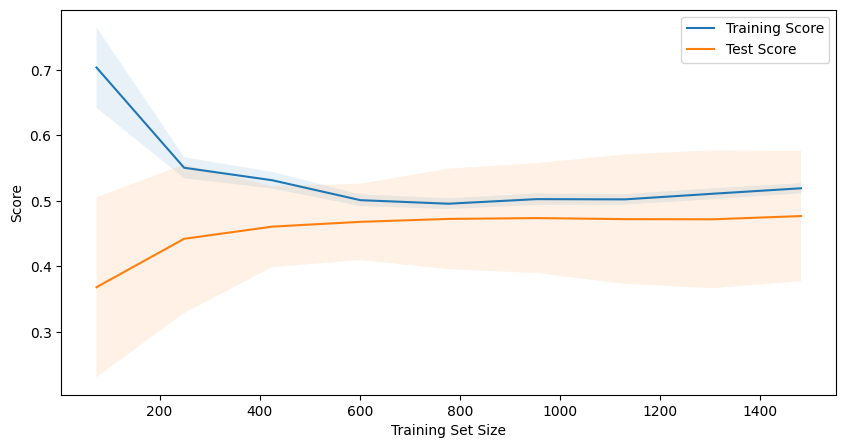

In [930]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs5, train_scores_mean5, label='Training Score')
axes.plot(train_sizes_abs5, test_scores_mean5, label='Test Score')

axes.fill_between(train_sizes_abs5,
                  train_scores_mean5 - train_scores_std5,
                  train_scores_mean5 + train_scores_std5,
                  alpha=0.1)

axes.fill_between(train_sizes_abs5,
                  test_scores_mean5 - test_scores_std5,
                  test_scores_mean5 + test_scores_std5,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

In [931]:
train_sizes_abs5D, train_scores5D, test_scores5D = learning_curve(DecisionTreeRegressor(), 
                                                            X_train5_scaled, 
                                                            y_train5, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [932]:
train_scores_mean5D = np.mean(train_scores5D, axis=1)
test_scores_mean5D = np.mean(test_scores5D, axis=1)
train_scores_std5D = np.std(train_scores5D, axis=1)
test_scores_std5D = np.std(test_scores5D, axis=1)

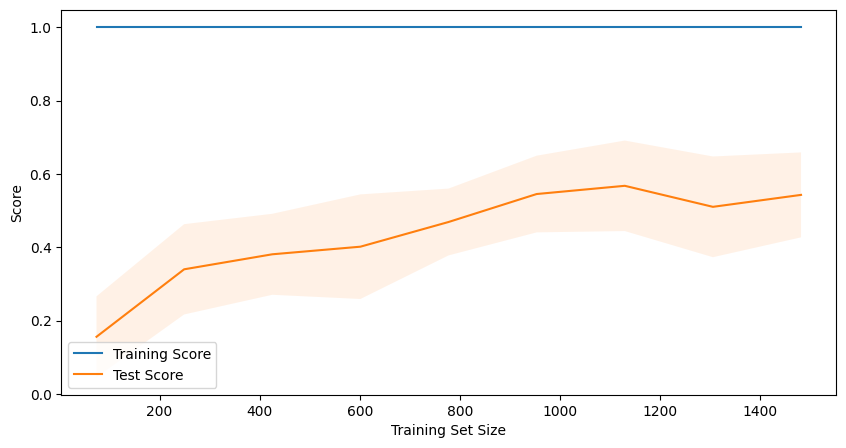

In [933]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs5D, train_scores_mean5D, label='Training Score')
axes.plot(train_sizes_abs5D, test_scores_mean5D, label='Test Score')

axes.fill_between(train_sizes_abs5D,
                  train_scores_mean5D - train_scores_std5D,
                  train_scores_mean5D + train_scores_std5D,
                  alpha=0.1)

axes.fill_between(train_sizes_abs5D,
                  test_scores_mean5D - test_scores_std5D,
                  test_scores_mean5D + test_scores_std5D,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

In [934]:
train_sizes_abs5F, train_scores5F, test_scores5F = learning_curve(RandomForestRegressor(), 
                                                            X_train5_scaled, 
                                                            y_train5, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [935]:
train_scores_mean5F = np.mean(train_scores5F, axis=1)
test_scores_mean5F = np.mean(test_scores5F, axis=1)
train_scores_std5F = np.std(train_scores5F, axis=1)
test_scores_std5F = np.std(test_scores5F, axis=1)

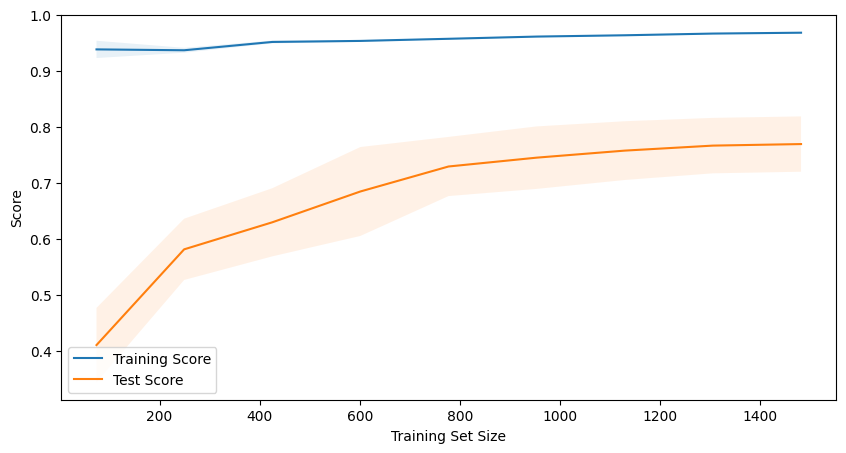

In [936]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs5F, train_scores_mean5F, label='Training Score')
axes.plot(train_sizes_abs5F, test_scores_mean5F, label='Test Score')

axes.fill_between(train_sizes_abs5F,
                  train_scores_mean5F - train_scores_std5F,
                  train_scores_mean5F + train_scores_std5F,
                  alpha=0.1)

axes.fill_between(train_sizes_abs5F,
                  test_scores_mean5F - test_scores_std5F,
                  test_scores_mean5F + test_scores_std5F,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

`Sumur UP-6`

In [937]:
train_sizes_abs6, train_scores6, test_scores6 = learning_curve(LinearRegression(), 
                                                            X_train6_scaled, 
                                                            y_train6, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [938]:
train_scores_mean6 = np.mean(train_scores6, axis=1)
test_scores_mean6 = np.mean(test_scores6, axis=1)
train_scores_std6 = np.std(train_scores6, axis=1)
test_scores_std6 = np.std(test_scores6, axis=1)

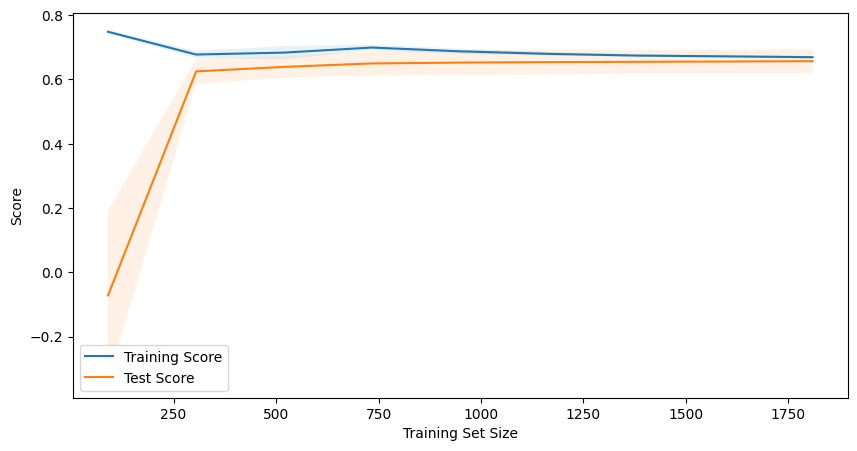

In [939]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs6, train_scores_mean6, label='Training Score')
axes.plot(train_sizes_abs6, test_scores_mean6, label='Test Score')

axes.fill_between(train_sizes_abs6,
                  train_scores_mean6 - train_scores_std6,
                  train_scores_mean6 + train_scores_std6,
                  alpha=0.1)

axes.fill_between(train_sizes_abs6,
                  test_scores_mean6 - test_scores_std6,
                  test_scores_mean6 + test_scores_std6,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

In [940]:
train_sizes_abs6D, train_scores6D, test_scores6D = learning_curve(DecisionTreeRegressor(), 
                                                            X_train6_scaled, 
                                                            y_train6, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [941]:
train_scores_mean6D = np.mean(train_scores6D, axis=1)
test_scores_mean6D = np.mean(test_scores6D, axis=1)
train_scores_std6D = np.std(train_scores6D, axis=1)
test_scores_std6D = np.std(test_scores6D, axis=1)

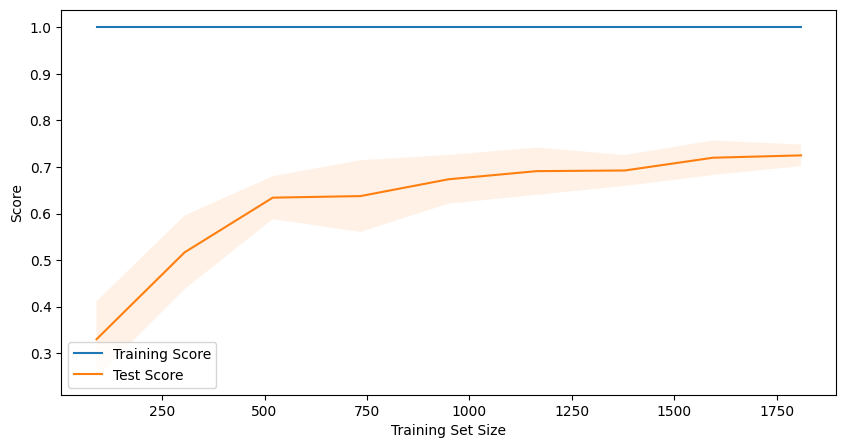

In [942]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs6D, train_scores_mean6D, label='Training Score')
axes.plot(train_sizes_abs6D, test_scores_mean6D, label='Test Score')

axes.fill_between(train_sizes_abs6D,
                  train_scores_mean6D - train_scores_std6D,
                  train_scores_mean6D + train_scores_std6D,
                  alpha=0.1)

axes.fill_between(train_sizes_abs6D,
                  test_scores_mean6D - test_scores_std6D,
                  test_scores_mean6D + test_scores_std6D,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

In [943]:
train_sizes_abs6F, train_scores6F, test_scores6F = learning_curve(RandomForestRegressor(), 
                                                            X_train6_scaled, 
                                                            y_train6, 
                                                            train_sizes=np.linspace(0.05,1,9),
                                                            cv=10)

In [944]:
train_scores_mean6F = np.mean(train_scores6F, axis=1)
test_scores_mean6F = np.mean(test_scores6F, axis=1)
train_scores_std6F = np.std(train_scores6F, axis=1)
test_scores_std6F = np.std(test_scores6F, axis=1)

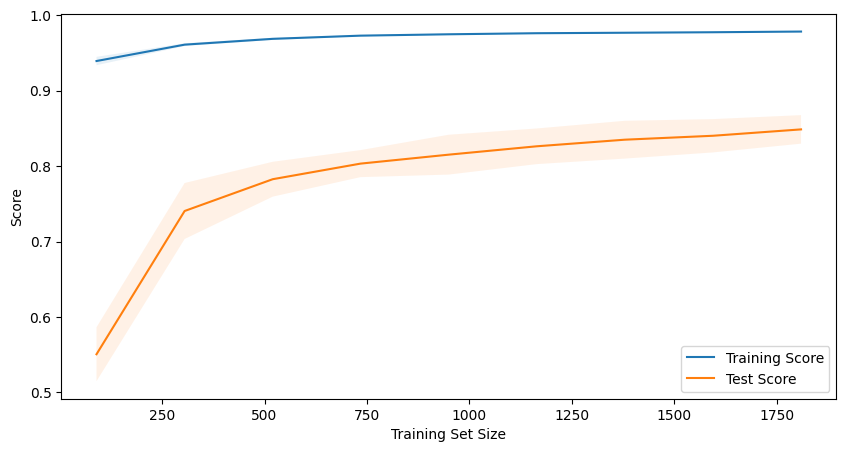

In [945]:
fig, axes = plt.subplots(1, 1, figsize=(10,5))
axes.plot(train_sizes_abs6F, train_scores_mean6F, label='Training Score')
axes.plot(train_sizes_abs6F, test_scores_mean6F, label='Test Score')

axes.fill_between(train_sizes_abs6F,
                  train_scores_mean6F - train_scores_std6F,
                  train_scores_mean6F + train_scores_std6F,
                  alpha=0.1)

axes.fill_between(train_sizes_abs6F,
                  test_scores_mean6F - test_scores_std6F,
                  test_scores_mean6F + test_scores_std6F,
                  alpha=0.1)

axes.set_xlabel('Training Set Size')
axes.set_ylabel('Score')
axes.legend()

#### Model Regression

##### Linear Model (Ordinary Least Square)

`Sumur UP-5`

In [946]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

regressor.fit(X_train5_scaled, y_train5)

LinearRegression()

In [947]:
#predict method to return the output of the model
y_pred_train5 = regressor.predict(X_train5_scaled)

In [948]:
y_pred_test5 = regressor.predict(X_test5_scaled)

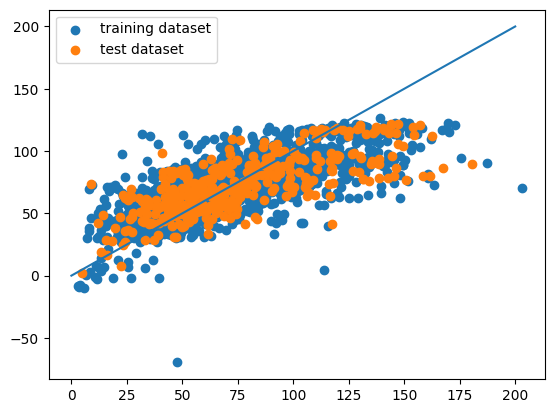

In [949]:
plt.scatter(y_train5, y_pred_train5, label="training dataset")
plt.scatter(y_test5, y_pred_test5, label="test dataset")
plt.plot([0,200], [0,200])
plt.legend()

In [950]:
from sklearn.metrics import r2_score

r2_score(y_train5, y_pred_train5) #training

0.5179928068928152

In [951]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train5, y_pred_train5, squared=False) #training

22.37248211989168

In [952]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train5, y_pred_train5) #training

16.718735533652485

In [953]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(regressor, X_train5_scaled, y_train5, cv=5))

0.446667643299748

In [954]:
from sklearn.metrics import r2_score

r2_score(y_test5, y_pred_test5) #testing

0.5200248210769955

In [955]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test5, y_pred_test5, squared=False) #testing

23.65879878764727

In [956]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test5, y_pred_test5) #testing

17.713843131027808

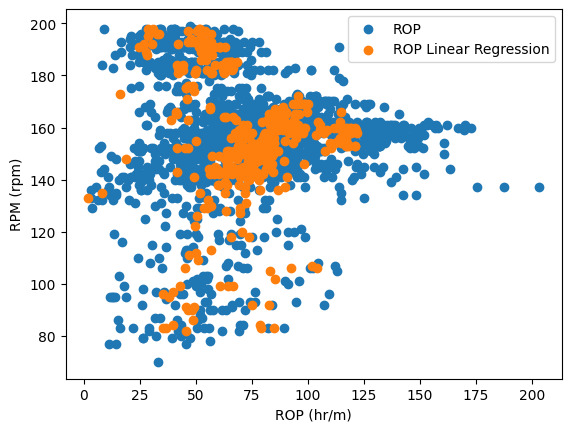

In [957]:
plt.scatter(y_train5, X_train5['RPM (rpm)'], label='ROP')
plt.scatter(y_pred_test5, X_test5['RPM (rpm)'], label='ROP Linear Regression')
plt.xlabel('ROP (hr/m)')
plt.ylabel('RPM (rpm)')
plt.legend()

`Sumur UP-6`

In [958]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train6_scaled, y_train6)

LinearRegression()

In [959]:
y_pred_train6 = regressor.predict(X_train6_scaled)

In [960]:
y_pred_test6 = regressor.predict(X_test6_scaled)

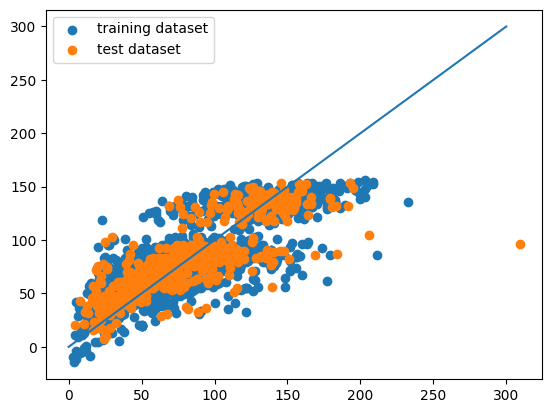

In [961]:
plt.scatter(y_train6, y_pred_train6, label="training dataset")
plt.scatter(y_test6, y_pred_test6, label="test dataset")
plt.plot([0,300], [0,300])
plt.legend()

In [962]:
from sklearn.metrics import r2_score

r2_score(y_train6, y_pred_train6) #training

0.6689284332230425

In [963]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train6, y_pred_train6, squared=False) #training

24.627933031265787

In [964]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train6, y_pred_train6) #training

18.805358120588163

In [965]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(regressor, X_train6_scaled, y_train6, cv=5))

0.6577528486695797

In [966]:
from sklearn.metrics import r2_score

r2_score(y_test6, y_pred_test6) #testing

0.6386997152817717

In [967]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test6, y_pred_test6, squared=False) #testing

25.734214171929395

In [968]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test6, y_pred_test6) #testing

18.140299770441004

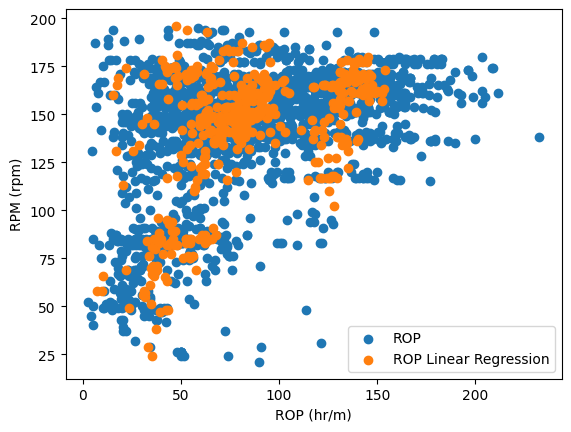

In [969]:
plt.scatter(y_train6, X_train6['RPM (rpm)'], label='ROP')
plt.scatter(y_pred_test6, X_test6['RPM (rpm)'], label='ROP Linear Regression')
plt.xlabel('ROP (hr/m)')
plt.ylabel('RPM (rpm)')
plt.legend()

##### Decision Tree

`Sumur UP-5`

In [970]:
from sklearn.tree import DecisionTreeRegressor

In [971]:
regressor2 = DecisionTreeRegressor()

regressor2.fit(X_train5_scaled,y_train5)

DecisionTreeRegressor()

In [972]:
y_pred_train5 = regressor2.predict(X_train5_scaled)

In [973]:
y_pred_test5 = regressor2.predict(X_test5_scaled)

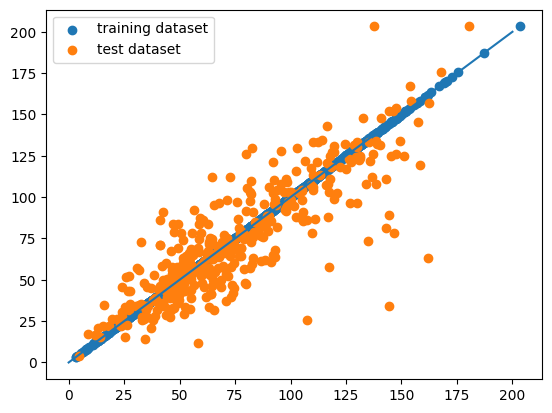

In [974]:
plt.scatter(y_train5, y_pred_train5, label="training dataset")
plt.scatter(y_test5, y_pred_test5, label="test dataset")
plt.plot([0,200], [0,200])
plt.legend()

In [975]:
from sklearn.metrics import r2_score

r2_score(y_train5, y_pred_train5) #training

1.0

In [976]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train5, y_pred_train5, squared=False) #training

0.0

In [977]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train5, y_pred_train5) #training

0.0

In [978]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(regressor2, X_train5_scaled, y_train5, cv=5))

0.5715311612550117

In [979]:
from sklearn.metrics import r2_score

r2_score(y_test5, y_pred_test5) #test

0.6935299741900087

In [980]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test5, y_pred_test5, squared=False) #test

18.905027070694434

In [981]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test5, y_pred_test5) #test

12.811650485436893

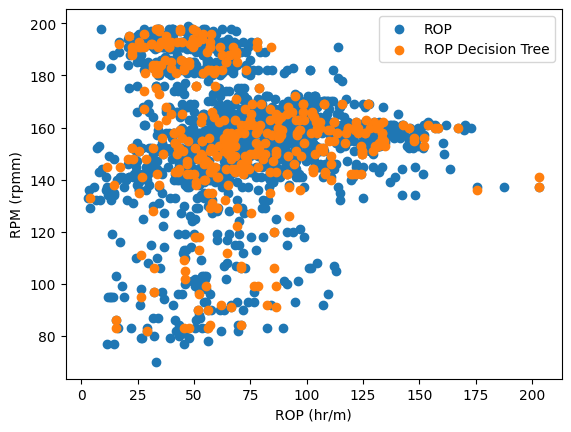

In [982]:
plt.scatter(y_train5, X_train5['RPM (rpm)'], label='ROP')
plt.scatter(y_pred_test5, X_test5['RPM (rpm)'], label='ROP Decision Tree')
plt.xlabel('ROP (hr/m)')
plt.ylabel('RPM (rpmm)')
plt.legend()

`Sumur UP-6`

In [983]:
from sklearn.tree import DecisionTreeRegressor

In [984]:
regressor2_1 = DecisionTreeRegressor()

regressor2_1.fit(X_train6_scaled,y_train6)

DecisionTreeRegressor()

In [985]:
y_pred_train6 = regressor2_1.predict(X_train6_scaled)

In [986]:
y_pred_test6 = regressor2_1.predict(X_test6_scaled)

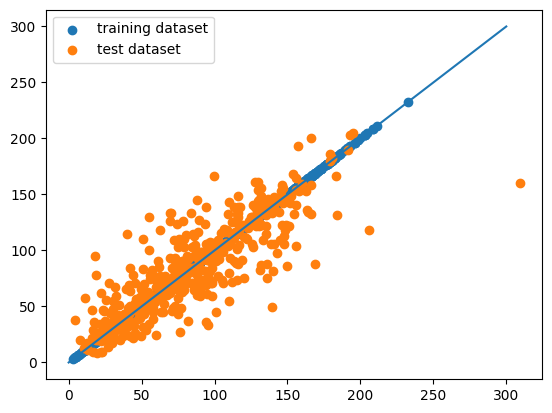

In [987]:
plt.scatter(y_train6, y_pred_train6, label="training dataset")
plt.scatter(y_test6, y_pred_test6, label="test dataset")
plt.plot([0,300], [0,300])
plt.legend()

In [988]:
from sklearn.metrics import r2_score

r2_score(y_train6, y_pred_train6) #training

1.0

In [989]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train6, y_pred_train6, squared=False) #training

1.372533037067313e-16

In [990]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train6, y_pred_train6) #training

5.3025577295529865e-18

In [991]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(regressor2_1, X_train6_scaled, y_train6, cv=5))

0.6951511287984035

In [992]:
from sklearn.metrics import r2_score

r2_score(y_test6, y_pred_test6) #test

0.7154902621046577

In [993]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test6, y_pred_test6, squared=False) #test

22.836278294893614

In [994]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test6, y_pred_test6) #test

15.18906560636183

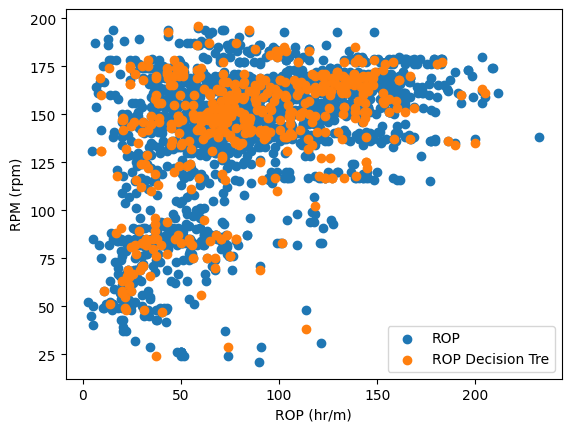

In [995]:
plt.scatter(y_train6, X_train6['RPM (rpm)'], label='ROP')
plt.scatter(y_pred_test6, X_test6['RPM (rpm)'], label='ROP Decision Tre')
plt.xlabel('ROP (hr/m)')
plt.ylabel('RPM (rpm)')
plt.legend()

##### Random Forest

`Sumur UP-5`

In [996]:
from sklearn.ensemble import RandomForestRegressor

In [997]:
regressor3 = RandomForestRegressor()
regressor3.fit(X_train5_scaled,y_train5)

RandomForestRegressor()

In [998]:
y_pred_train5 = regressor3.predict(X_train5_scaled)

In [999]:
y_pred_test5 = regressor3.predict(X_test5_scaled)

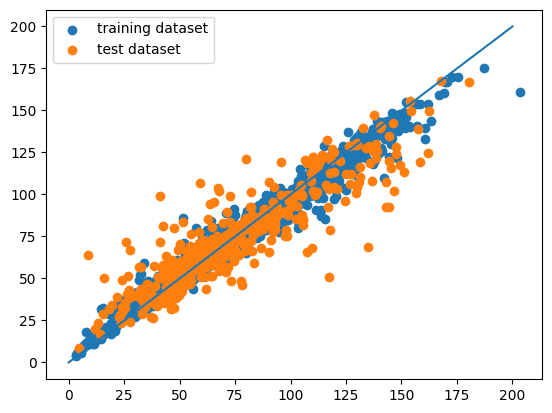

In [1000]:
plt.scatter(y_train5, y_pred_train5, label="training dataset")
plt.scatter(y_test5, y_pred_test5, label="test dataset")
plt.plot([0,200], [0,200])
plt.legend()

In [1001]:
from sklearn.metrics import r2_score

r2_score(y_train5, y_pred_train5) #training

0.9676691982924129

In [1002]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train5, y_pred_train5, squared=False) #training

5.7942288869958105

In [1003]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train5, y_pred_train5) #training

3.953888213851761

In [1004]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(regressor3, X_train5_scaled, y_train5, cv=5))

0.7702915411367346

In [1005]:
from sklearn.metrics import r2_score

r2_score(y_test5, y_pred_test5) #test

0.8007382074809716

In [1006]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test5, y_pred_test5, squared=False) #testing

15.243872846227159

In [1007]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test5, y_pred_test5) #testing

10.573225728155336

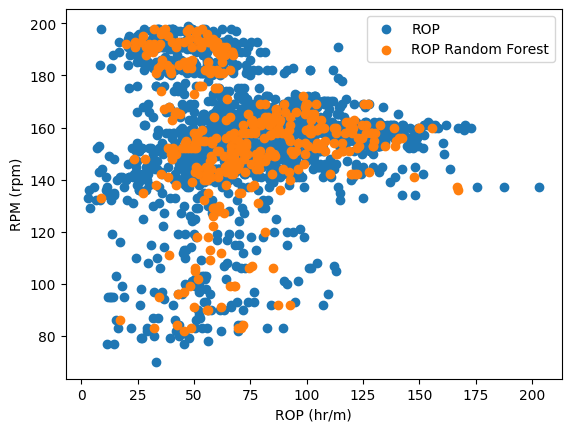

In [1008]:
plt.scatter(y_train5, X_train5['RPM (rpm)'], label='ROP')
plt.scatter(y_pred_test5, X_test5['RPM (rpm)'], label='ROP Random Forest')
plt.xlabel('ROP (hr/m)')
plt.ylabel('RPM (rpm)')
plt.legend()

`Sumur UP-6`

In [1009]:
from sklearn.ensemble import RandomForestRegressor

In [1010]:
regressor3_1 = RandomForestRegressor()
regressor3_1.fit(X_train6_scaled,y_train6)

RandomForestRegressor()

In [1011]:
y_pred_train6 = regressor3_1.predict(X_train6_scaled)

In [1012]:
y_pred_test6 = regressor3_1.predict(X_test6_scaled)

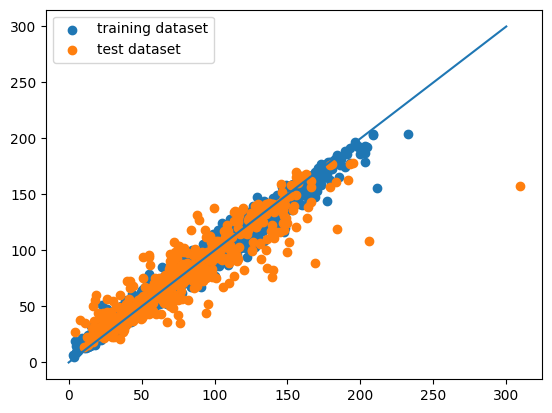

In [1013]:
plt.scatter(y_train6, y_pred_train6, label="training dataset")
plt.scatter(y_test6, y_pred_test6, label="test dataset")
plt.plot([0,300], [0,300])
plt.legend()

In [1014]:
from sklearn.metrics import r2_score

r2_score(y_train6, y_pred_train6) #training

0.9790757307638034

In [1015]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train6, y_pred_train6, squared=False) #training

6.191447172033338

In [1016]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_train6, y_pred_train6) #training

4.335127860696519

In [1017]:
from sklearn.model_selection import cross_val_score

np.mean(cross_val_score(regressor3_1, X_train6_scaled, y_train6, cv=5))

0.8390092211698222

In [1018]:
from sklearn.metrics import r2_score

r2_score(y_test6, y_pred_test6) #test

0.8299089119255761

In [1019]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test6, y_pred_test6, squared=False) #testing

17.657025279859525

In [1020]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test6, y_pred_test6) #testing

11.375900596421467

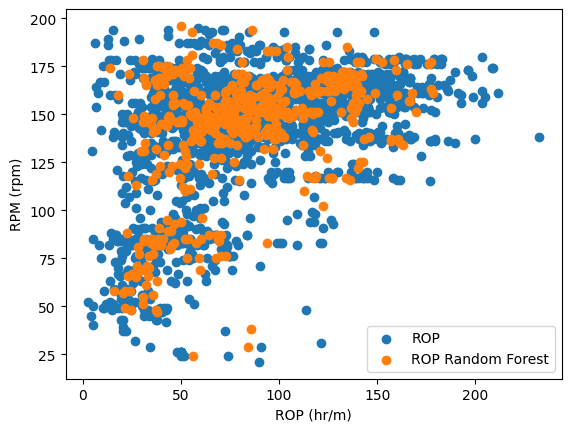

In [1021]:
plt.scatter(y_train6, X_train6['RPM (rpm)'], label='ROP')
plt.scatter(y_pred_test6, X_test6['RPM (rpm)'], label='ROP Random Forest')
plt.xlabel('ROP (hr/m)')
plt.ylabel('RPM (rpm)')
plt.legend()

#### Feature Importance

`Sumur UP-5`

In [1022]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train5,y_train5)


RandomForestRegressor()

In [1023]:
rf.feature_importances_

array([1.15723056e-01, 1.26733407e-01, 7.15032136e-02, 1.04139794e-01,
       6.52127460e-02, 1.53639767e-01, 1.20694193e-01, 4.94291415e-04,
       1.79135185e-02, 3.34688035e-02, 1.13777535e-01, 4.58464963e-02,
       8.20897835e-03, 9.69338710e-03, 3.35157114e-03, 1.72026989e-04,
       2.55843576e-04, 1.23991764e-05, 3.53908778e-04, 3.16976338e-04,
       8.48808683e-03])

Text(0.5, 0, 'Random Forest Feature Importance')

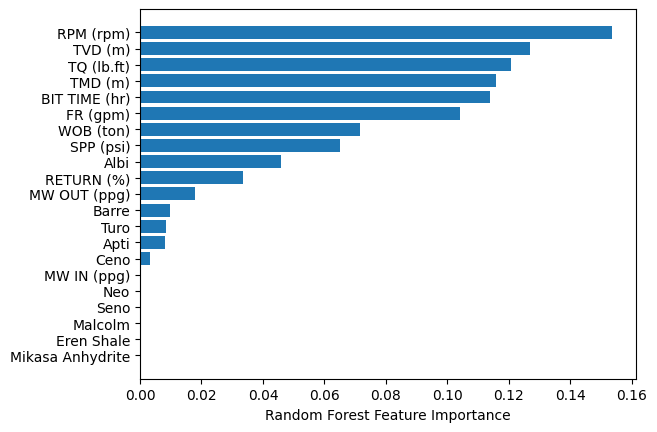

In [1024]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(input_data_up5.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [1025]:
from sklearn.inspection import permutation_importance

In [1026]:
perm_importance = permutation_importance(rf, X_test5, y_test5)

Text(0.5, 0, 'Permutation Importance')

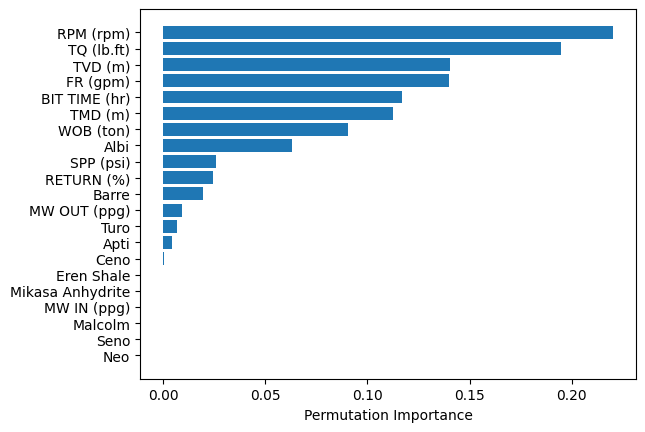

In [1027]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(input_data_up5.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

`Sumur UP-6`

In [1028]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train6,y_train6)

RandomForestRegressor()

Text(0.5, 0, 'Random Forest Feature Importance')

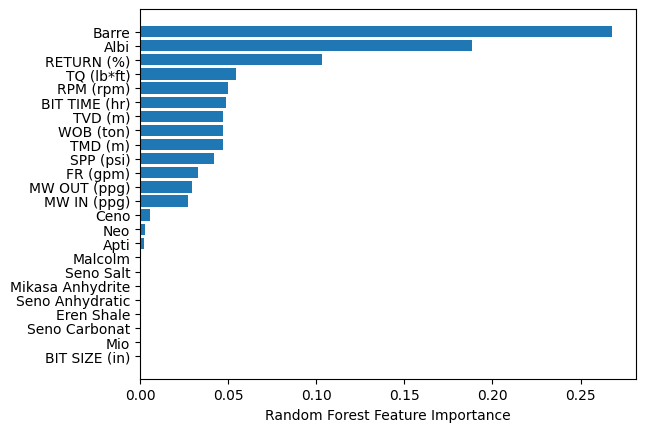

In [1029]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(input_data_up6.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [1030]:
from sklearn.inspection import permutation_importance

In [1031]:
perm_importance = permutation_importance(rf, X_test6, y_test6)

Text(0.5, 0, 'Permutation Importance')

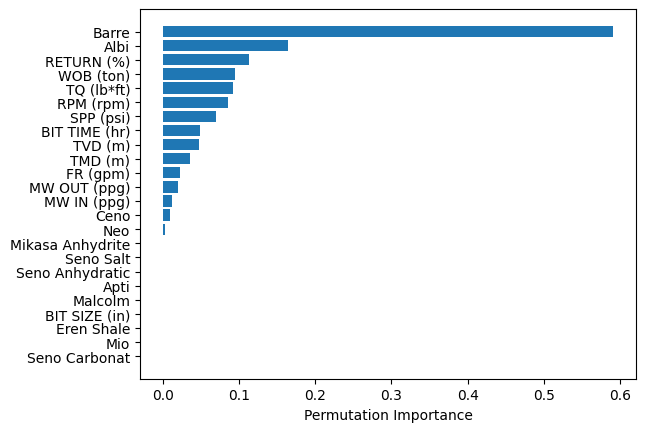

In [1032]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(input_data_up6.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")